# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Task:** 

데이터 세트의 환자가 당뇨병이 있는지 여부를 예측하기 위한 모델 구축. 

이를 위해 5가지 모델을 구축해보고자 함
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* SVC
* Neural Network

그 다음, 정확도와 AUC를 이용하여 다섯가지 모델 중 가장 정확한 모델 하나를 선정하는 방식으로 진행하려 함.

**Datasets**

이 데이터 세트는 피마 인디언 혈통인 최소 21세 이상의 여성들로부터 환자의 임신 횟수, BMI, 인슐린 수치, 연령 등 특정 측정을 기반으로 환자가 당뇨병이 있는지 여부를 예측하는 것을 목적으로 구성됨.

총 768개의 환자 데이터로 구성되어 있으며, Train:Validation:Test=6:2:2 비율로 나눠서 진행하려고 함.

* Train dataset: 60%(460개)

* Validation dataset: 20%(154개)

* Test dataset: 20%(154개)

**Features(x):**

8가지 feature로 구성

* Pregnancies: 임신 횟수
* Glucose: 경구 포도당 부하검사 2시간 후 혈장 포도당 농도
* BloodPressure: 이완기 혈압(mm Hg)
* SkinThickness: 삼두근 피부 두께(mm)
* Insulin: 식후 2시간 후 혈청 인슐린(mu U/ml)
* BMI: 체질량 지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨병 혈통 함수
* Age: 연령(세)

**Target(y):**

2가지 class로 분류

* 0: 당뇨병이 아닌 환자
* 1: 당뇨병 환자

---

## Build Your Model

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

### Data preprocessing

In [2]:
# Raw Data
rData = pd.read_csv('/Users/dahyun/Downloads/archive/diabetes.csv')
rData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Data balance 확인
rData['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
# Missing values 확인
rData.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Feature와 target을 분리
X = rData.drop('Outcome', axis=1)
y = rData['Outcome']

In [6]:
# Train, Validation, Test set을 6:2:2 비율로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=0)

In [7]:
# Data scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

In [8]:
# Neural Network 모델을 위해 Tensor로 전환
X_train_ts = torch.from_numpy(X_train_sc).float()
X_val_ts = torch.from_numpy(X_val_sc).float()
X_test_ts = torch.from_numpy(X_test_sc).float()

y_train_ts = y_train.values
y_val_ts = y_val.values
y_test_ts = y_test.values

y_train_ts = torch.from_numpy(y_train_ts).float()
y_val_ts = torch.from_numpy(y_val_ts).float()
y_test_ts = torch.from_numpy(y_test_ts).float()

### Model Construction

In [9]:
# Neural Network 모델을 위한 class 선언
# 8->4->1 차원으로 설정, 2개의 fully connected layer
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8,4)
        self.fc2 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

### Train Model & Select Model

**Logistic Regression**

In [10]:
# GridSearchCV를 이용한 하이퍼 파라미터 튜닝
params = {'C':[0.5,1,3,5,7,10],
          'max_iter':[50,100,200,300,500]}
lr = LogisticRegression(random_state=0)
gs = GridSearchCV(lr, params, cv=5, n_jobs=-1)
gs.fit(X_train_sc, y_train)

print('최적 하이퍼 파라미터:',gs.best_params_)

최적 하이퍼 파라미터: {'C': 0.5, 'max_iter': 50}


--------------------------------------------------
Accuracy score of Logistic regression
--------------------------------------------------
Train: 78.26%
Validation: 74.68%
Test: 83.77%
--------------------------------------------------


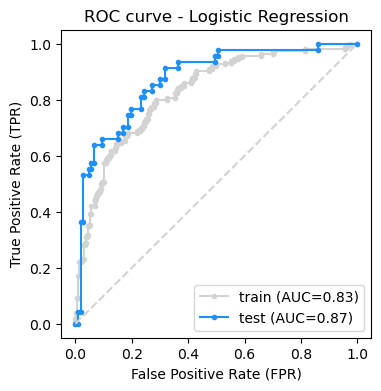

In [11]:
lr = LogisticRegression(C=0.5, max_iter=50, random_state=0)

lr.fit(X_train_sc, y_train)

# Accuracy Score 출력
print('-'*50)
print('Accuracy score of Logistic regression')
print('-'*50)

pre = lr.predict(X_train_sc)
print(f'Train: {round(accuracy_score(y_train, pre)*100,2)}%')

pre = lr.predict(X_val_sc)
print(f'Validation: {round(accuracy_score(y_val, pre)*100,2)}%')

pre = lr.predict(X_test_sc)
print(f'Test: {round(accuracy_score(y_test, pre)*100,2)}%')
print('-'*50)

# ROC curve 생성
lr_train_probs = lr.predict_proba(X_train_sc)[:,1]
lr_test_probs = lr.predict_proba(X_test_sc)[:,1]

lr_train_fpr, lr_train_tpr, lr_train_ = roc_curve(y_train, lr_train_probs)
lr_test_fpr, lr_test_tpr, lr_test_ = roc_curve(y_test, lr_test_probs)

plt.figure(figsize=(4,4))
plt.plot(lr_train_fpr, lr_train_tpr, color='lightgray', marker='.', label=f'train (AUC={round(roc_auc_score(y_train, lr_train_probs),2)})')
plt.plot(lr_test_fpr, lr_test_tpr, color='dodgerblue', marker='.', label=f'test (AUC={round(roc_auc_score(y_test, lr_test_probs),2)})')
plt.plot([0,1],[0,1], color='lightgray',linestyle='--')
plt.title('ROC curve - Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**Decision Tree Classifier**

In [12]:
# GridSearchCV를 이용한 하이퍼 파라미터 튜닝
params = {'criterion' : ['gini','entropy'],
          'splitter' : ['best','random'],
          'max_depth' : [i for i in range(1,10)],
          'min_samples_split' : [i for i in range(2,10)]}
dtc = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(dtc, params, cv=5, n_jobs=-1)
gs.fit(X_train_sc, y_train)

print('최적 하이퍼 파라미터:',gs.best_params_)

최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}


--------------------------------------------------
Accuracy score of Decision Tree Classifier
--------------------------------------------------
Train: 77.17%
Validation: 74.03%
Test: 76.62%
--------------------------------------------------


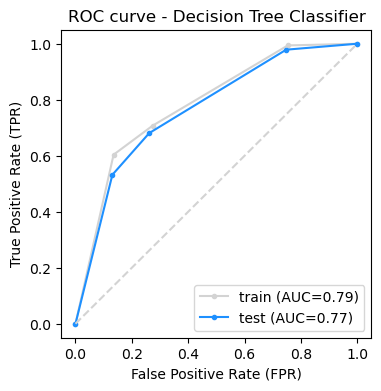

In [13]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, splitter='best', random_state=0)

dtc.fit(X_train_sc, y_train)

# Accuracy Score 출력
print('-'*50)
print('Accuracy score of Decision Tree Classifier')
print('-'*50)

pre = dtc.predict(X_train_sc)
print(f'Train: {round(accuracy_score(y_train, pre)*100,2)}%')

pre = dtc.predict(X_val_sc)
print(f'Validation: {round(accuracy_score(y_val, pre)*100,2)}%')

pre = dtc.predict(X_test_sc)
print(f'Test: {round(accuracy_score(y_test, pre)*100,2)}%')
print('-'*50)

# ROC curve 생성
dtc_train_probs = dtc.predict_proba(X_train_sc)[:,1]
dtc_test_probs = dtc.predict_proba(X_test_sc)[:,1]

dtc_train_fpr, dtc_train_tpr, dtc_train_ = roc_curve(y_train, dtc_train_probs)
dtc_test_fpr, dtc_test_tpr, dtc_test_ = roc_curve(y_test, dtc_test_probs)

plt.figure(figsize=(4,4))
plt.plot(dtc_train_fpr, dtc_train_tpr, color='lightgray', marker='.', label=f'train (AUC={round(roc_auc_score(y_train, dtc_train_probs),2)})')
plt.plot(dtc_test_fpr, dtc_test_tpr, color='dodgerblue', marker='.', label=f'test (AUC={round(roc_auc_score(y_test, dtc_test_probs),2)})')
plt.plot([0,1],[0,1], color='lightgray',linestyle='--')
plt.title('ROC curve - Decision Tree Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**Random Forest Classifier**

In [14]:
# GridSearchCV를 이용한 하이퍼 파라미터 튜닝
params = {'n_estimators' : [10, 50, 100, 150, 200],
          'max_depth' : [i for i in range(1,10)],
          'min_samples_leaf' : [i for i in range(1,10)],
          'min_samples_split' : [i for i in range(2,10)]}
rfc = RandomForestClassifier(random_state=0)
gs = GridSearchCV(rfc, params, cv=5, n_jobs=-1)
gs.fit(X_train_sc, y_train)

print('최적 하이퍼 파라미터:',gs.best_params_)

최적 하이퍼 파라미터: {'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 10}


--------------------------------------------------
Accuracy score of Random Forest Classifier
--------------------------------------------------
Train: 83.91%
Validation: 74.68%
Test: 84.42%
--------------------------------------------------


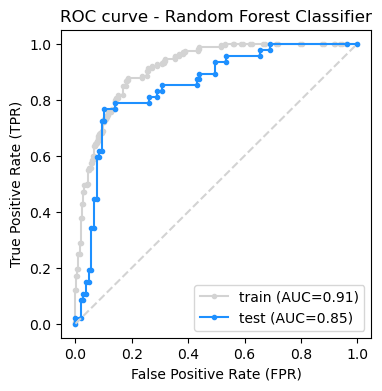

In [15]:
rfc = RandomForestClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=2, n_estimators=10, random_state=0)

rfc.fit(X_train_sc, y_train)

# Accuracy Score 출력
print('-'*50)
print('Accuracy score of Random Forest Classifier')
print('-'*50)

pre = rfc.predict(X_train_sc)
print(f'Train: {round(accuracy_score(y_train, pre)*100,2)}%')

pre = rfc.predict(X_val_sc)
print(f'Validation: {round(accuracy_score(y_val, pre)*100,2)}%')

pre = rfc.predict(X_test_sc)
print(f'Test: {round(accuracy_score(y_test, pre)*100,2)}%')
print('-'*50)

# ROC curve 생성
rfc_train_probs = rfc.predict_proba(X_train_sc)[:,1]
rfc_test_probs = rfc.predict_proba(X_test_sc)[:,1]

rfc_train_fpr, rfc_train_tpr, rfc_train_ = roc_curve(y_train, rfc_train_probs)
rfc_test_fpr, rfc_test_tpr, rfc_test_ = roc_curve(y_test, rfc_test_probs)

plt.figure(figsize=(4,4))
plt.plot(rfc_train_fpr, rfc_train_tpr, color='lightgray', marker='.', label=f'train (AUC={round(roc_auc_score(y_train, rfc_train_probs),2)})')
plt.plot(rfc_test_fpr, rfc_test_tpr, color='dodgerblue', marker='.', label=f'test (AUC={round(roc_auc_score(y_test, rfc_test_probs),2)})')
plt.plot([0,1],[0,1], color='lightgray',linestyle='--')
plt.title('ROC curve - Random Forest Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**SVC**

In [16]:
# GridSearchCV를 이용한 하이퍼 파라미터 튜닝
params = {'C':[0.01, 0.1, 1, 10],
          'kernel':['linear', 'rbf'],
          'gamma':['scale','auto']}
svc = SVC(random_state=0)
gs = GridSearchCV(svc, params, cv=5, n_jobs=-1)
gs.fit(X_train_sc, y_train)

print('최적 하이퍼 파라미터:',gs.best_params_)

최적 하이퍼 파라미터: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


--------------------------------------------------
Accuracy score of SVC
--------------------------------------------------
Train: 76.96%
Validation: 74.68%
Test: 84.42%
--------------------------------------------------


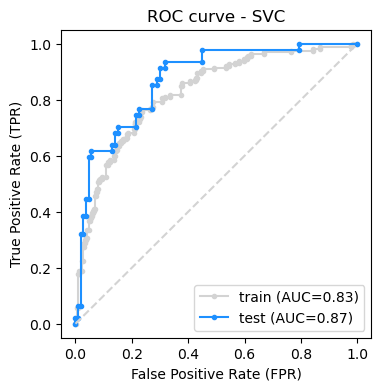

In [17]:
svc = SVC(C=0.01, gamma='scale', kernel='linear', probability=True, random_state=0)

svc.fit(X_train_sc, y_train)

# Accuracy Score 출력
print('-'*50)
print('Accuracy score of SVC')
print('-'*50)

pre = svc.predict(X_train_sc)
print(f'Train: {round(accuracy_score(y_train, pre)*100,2)}%')

pre = svc.predict(X_val_sc)
print(f'Validation: {round(accuracy_score(y_val, pre)*100,2)}%')

pre = svc.predict(X_test_sc)
print(f'Test: {round(accuracy_score(y_test, pre)*100,2)}%')
print('-'*50)

# ROC curve 생성
svc_train_probs = svc.predict_proba(X_train_sc)[:,1]
svc_test_probs = svc.predict_proba(X_test_sc)[:,1]

svc_train_fpr, svc_train_tpr, svc_train_ = roc_curve(y_train, svc_train_probs)
svc_test_fpr, svc_test_tpr, svc_test_ = roc_curve(y_test, svc_test_probs)

plt.figure(figsize=(4,4))
plt.plot(svc_train_fpr, svc_train_tpr, color='lightgray', marker='.', label=f'train (AUC={round(roc_auc_score(y_train, svc_train_probs),2)})')
plt.plot(svc_test_fpr, svc_test_tpr, color='dodgerblue', marker='.', label=f'test (AUC={round(roc_auc_score(y_test, svc_test_probs),2)})')
plt.plot([0,1],[0,1], color='lightgray',linestyle='--')
plt.title('ROC curve - SVC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**Neural Network**

In [18]:
net = Net()
loss = nn.BCELoss() # Loss 함수는 BCE
optimizer = optim.Adam(net.parameters(),lr=0.01) # 보통 Adam을 쓴다고 하여 Adam으로 진행

num_epochs = 10000

for epoch in range(num_epochs):
   
    pre = net(X_train_ts)
    cost = loss(pre, y_train_ts.view(-1,1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if (epoch+1)%1000 == 0:
        print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, cost.item()))

Epoch [1000/10000], Loss: 0.4123
Epoch [2000/10000], Loss: 0.3927
Epoch [3000/10000], Loss: 0.3840
Epoch [4000/10000], Loss: 0.3782
Epoch [5000/10000], Loss: 0.3733
Epoch [6000/10000], Loss: 0.3691
Epoch [7000/10000], Loss: 0.3657
Epoch [8000/10000], Loss: 0.3624
Epoch [9000/10000], Loss: 0.3598
Epoch [10000/10000], Loss: 0.3570


In [19]:
print('-'*50)
print('Accuracy score of Neural Network')
print('-'*50)

# 모델 평가 및 정확도 출력
net.eval()
with torch.no_grad():
    outputs = net(X_val_ts)
    predicted = torch.round(outputs)
    accuracy = (predicted == y_val_ts.view(-1, 1)).sum().float() / len(y_val_ts)
    print(f'Validation: {round(accuracy.item()*100,2)}%')

with torch.no_grad():
    outputs = net(X_test_ts)
    predicted = torch.round(outputs)
    accuracy = (predicted == y_test_ts.view(-1, 1)).sum().float() / len(y_test_ts)
    print(f'Test: {round(accuracy.item()*100,2)}%')

print('-'*50)

--------------------------------------------------
Accuracy score of Neural Network
--------------------------------------------------
Validation: 78.57%
Test: 80.52%
--------------------------------------------------


---

## Performance

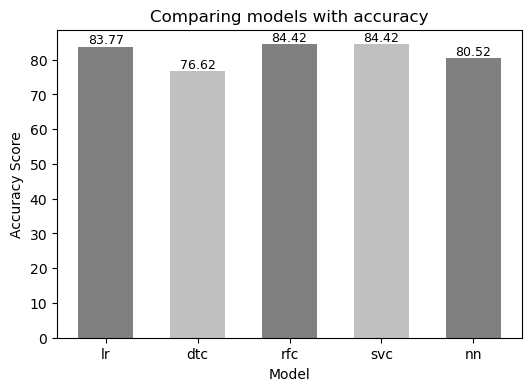

In [20]:
# 위에서 구축한 5가지 모델의 정확도 비교
pre = lr.predict(X_test_sc)
lr_score = round(accuracy_score(y_test, pre)*100,2)
pre = dtc.predict(X_test_sc)
dtc_score = round(accuracy_score(y_test, pre)*100,2)
pre = rfc.predict(X_test_sc)
rfc_score = round(accuracy_score(y_test, pre)*100,2)
pre = svc.predict(X_test_sc)
svc_score = round(accuracy_score(y_test, pre)*100,2)
nn_score = round(accuracy.item()*100,2)

x = ['LR','DTC','RFC','SVC','NN']
y = [lr_score, dtc_score, rfc_score, svc_score, nn_score]

# Bar plot 생성
plt.figure(figsize=(6,4))
plt.title('Comparing models with accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.bar(x, y, width=0.6, color=['gray','silver'])
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
            fontsize = 9,
            horizontalalignment='center',
            verticalalignment='bottom')

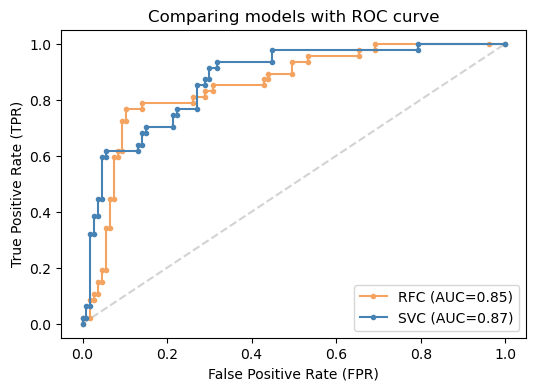

In [35]:
# 정확도가 가장 높은 2가지 모델의 AUC 비교

# ROC curve 생성
plt.figure(figsize=(6,4))
plt.plot([0,1],[0,1], color='lightgray',linestyle='--')
plt.plot(rfc_test_fpr, rfc_test_tpr, color='sandybrown', marker='.', label=f'RFC (AUC={round(roc_auc_score(y_test, rfc_test_probs),2)})')
plt.plot(svc_test_fpr, svc_test_tpr, color='steelblue', marker='.', label=f'SVC (AUC={round(roc_auc_score(y_test, svc_test_probs),2)})')
plt.title('Comparing models with ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**The results explains**

* 5가지 모델(Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Classification, Neural Network)을 구축. 각 모델별 정확도는 83.77, 76.62, 84.42, 84.42, 80.52로 측정됨.

* 정확도가 크게 차이나지 않지만, 그 중에서도 가장 정확도가 높았던 두가지 모델(Random Forest Classifier, Support Vector Classification)에 대해 ROC curve를 그려 AUC를 측정함.

* 정확도와 AUC를 종합적으로 봤을 때, SVC가 가장 우수한 모델이라고 추정.


Limitation

* 아직 딥러닝에 관한 이해도가 낮아 프로그래밍을 하는 데에 미숙한 점이 존재.
* GridSearchCV를 진행할 때 넣어준 하이퍼 파라미터 기준이 모호.